### Import libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate data

In [85]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

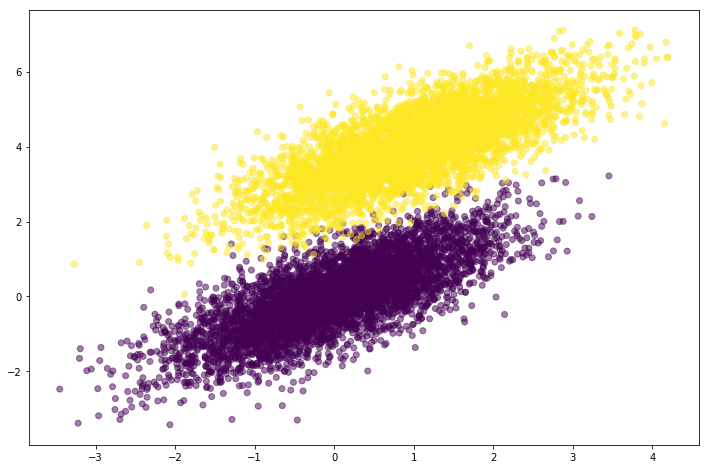

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = Y, alpha = .5)

In [87]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [88]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [89]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [90]:
weights = logistic_regression(X, Y, num_steps = 100000, learning_rate = 0.0001, add_intercept=True)

-4415.231799066218
-142.9637674033221
-141.06016657098735
-140.79022965222939
-140.7391385932077
-140.7284351878644
-140.72609474252658
-140.72557298679322
-140.7254556230395
-140.7254291114734


In [91]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(X, Y)

print (clf.intercept_, clf.coef_)
print (weights)

[-9.17331445] [[-3.30270554  5.45797459]]
[-14.09049582  -5.05837709   8.28854273]


In [92]:
data_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == Y).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(X, Y)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.995


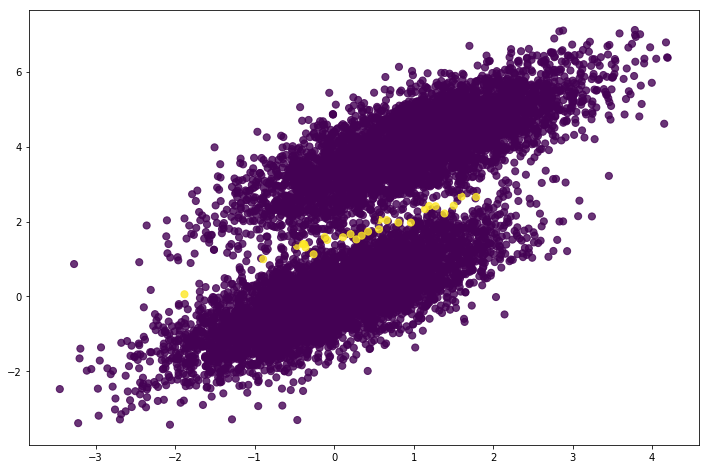

In [93]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)

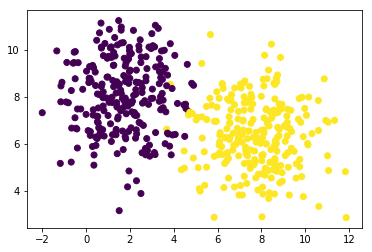

In [98]:
from sklearn.datasets.samples_generator import make_blobs

(X, y) =  make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.5, random_state=20)

plt.scatter(X[:,0],X[:,1],marker='o', c=y)
plt.show()

In [99]:
weights = logistic_regression(X, y, num_steps = 100000, learning_rate = 0.0001, add_intercept=True)

-292.4524640546159
-22.399115054264534
-20.57422369589991
-19.43038378337858
-18.675108177140373
-18.15451473522773
-17.783020972412757
-17.51040148958614
-17.305726427783114
-17.149145656022796


In [100]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)

print (clf.intercept_, clf.coef_)
print (weights)

[-1.69375721] [[ 2.24767683 -1.1843434 ]]
[-8.21203015  3.35840406 -0.98329587]


In [101]:
data_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == y).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(X, y)))

Accuracy from scratch: 0.992
Accuracy from sk-learn: 0.986


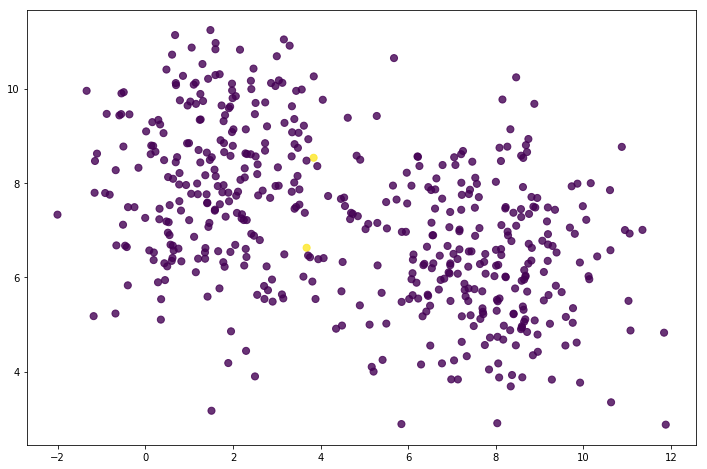

In [103]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c = preds == y - 1, alpha = .8, s = 50)

https://beckernick.github.io/logistic-regression-from-scratch/

In [130]:
# from math import exp

# # Make a prediction with coefficients
# def predict(row, coefficients):
# 	yhat = coefficients[0]
# 	for i in range(len(row)-1):
# 		yhat += coefficients[i + 1] * row[i]
# 	return 1.0 / (1.0 + exp(-yhat))

# # Estimate logistic regression coefficients using stochastic gradient descent
# def coefficients_sgd(train, l_rate, n_epoch):
# 	coef = [0.0 for i in range(len(train[0]))]
# 	for epoch in range(n_epoch):
# 		sum_error = 0
# 		for row in train:
# 			yhat = predict(row, coef)
# 			error = row[-1] - yhat
# 			sum_error += error**2
# 			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
# 			for i in range(len(row)-1):
# 				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
# 		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
# 	return coef

# # Calculate coefficients
# np.random.seed(12)
# num_observations = 5000

# x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
# x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

# X = np.vstack((x1, x2)).astype(np.float32)
# Y = np.hstack((np.zeros(num_observations),
#                               np.ones(num_observations)))
# Y = np.reshape(Y, (Y.shape[0], 1))
# dataset = np.hstack((X, Y))
# l_rate = 0.03
# n_epoch = 100
# coef = coefficients_sgd(dataset, l_rate, n_epoch)
# print(coef)

>epoch=0, lrate=0.030, error=185.701
>epoch=1, lrate=0.030, error=100.857
>epoch=2, lrate=0.030, error=76.616
>epoch=3, lrate=0.030, error=67.739
>epoch=4, lrate=0.030, error=62.804
>epoch=5, lrate=0.030, error=59.571
>epoch=6, lrate=0.030, error=57.254
>epoch=7, lrate=0.030, error=55.497
>epoch=8, lrate=0.030, error=54.108
>epoch=9, lrate=0.030, error=52.977
>epoch=10, lrate=0.030, error=52.033
>epoch=11, lrate=0.030, error=51.231
>epoch=12, lrate=0.030, error=50.539
>epoch=13, lrate=0.030, error=49.935
>epoch=14, lrate=0.030, error=49.402
>epoch=15, lrate=0.030, error=48.927
>epoch=16, lrate=0.030, error=48.500
>epoch=17, lrate=0.030, error=48.115
>epoch=18, lrate=0.030, error=47.764
>epoch=19, lrate=0.030, error=47.444
>epoch=20, lrate=0.030, error=47.150
>epoch=21, lrate=0.030, error=46.880
>epoch=22, lrate=0.030, error=46.629
>epoch=23, lrate=0.030, error=46.396
>epoch=24, lrate=0.030, error=46.180
>epoch=25, lrate=0.030, error=45.977
>epoch=26, lrate=0.030, error=45.788
>epoch=27